In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch 
import sklearn

from pathlib import Path
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import ks_2samp

# Experiment 5 - Gender bias in CelebA

In [4]:
"""
Code from Ivan's answer to
https://stackoverflow.com/questions/37921295/python-pil-image-make-3x3-grid-from-sequence-images
"""

def grid(imgs, cols, rows):

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
        
    return grid

In [5]:
root = Path("../")
data = root/"data"
celeba_folder = data/"celeba"

images_folder = celeba_folder/"img_align_celeba"

In [6]:
female = pd.read_csv(celeba_folder/"celeba_female.csv")

female.drop(female.columns[0], axis=1, inplace=True)

female.head()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000004.jpg                -1               -1           1               -1   
3  000005.jpg                -1                1           1               -1   
4  000006.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Smiling  Straight_Hair  \
0    -1     -1        -1        -1          -1  ...        1              1   
1    -1     -1        -1         1          -1  ...        1             -1   
2    -1     -1        -1        -1          -1  ...       -1              1   
3    -1     -1         1        -1          -1  ...       -1             -1   
4    -1     -1         1        -1          -1  ...       -1             -1   

   Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0         -1                 1           -1                 1   
1         -1                -1           -1                -1   
2         -1                 1           -1                 1   
3         -1                -1           -1                 1   
4          1                 1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  Kantorovich_potential  
0                -1               -1      1              82.637604  
1                -1               -1      1              19.045990  
2                 1               -1      1              26.501953  
3                -1               -1      1              38.733154  
4                -1               -1      1              45.056549  

[5 rows x 42 columns]

In [7]:
female.sort_values(by="Kantorovich_potential", ascending=False, inplace=True)

In [8]:
female[:36].head()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
3405    005886.jpg                -1                1           1   
7927    013744.jpg                -1                1           1   
114489  196600.jpg                -1               -1           1   
23734   040796.jpg                -1                1          -1   
82364   141744.jpg                -1               -1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
3405                 -1    -1     -1        -1        -1          -1  ...   
7927                 -1    -1     -1         1        -1           1  ...   
114489               -1    -1     -1        -1        -1          -1  ...   
23734                -1    -1      1        -1        -1          -1  ...   
82364                -1    -1     -1        -1        -1          -1  ...   

        Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  \
3405         -1             -1          1                -1           -1   
7927          1             -1         -1                 1           -1   
114489       -1             -1         -1                -1           -1   
23734        -1             -1          1                 1           -1   
82364        -1             -1         -1                -1           -1   

        Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  Young  \
3405                   1                -1               -1      1   
7927                   1                -1               -1      1   
114489                 1                -1               -1      1   
23734                  1                 1               -1      1   
82364                  1                -1               -1      1   

        Kantorovich_potential  
3405               150.632507  
7927               142.508301  
114489             142.315216  
23734              140.370148  
82364              139.655518  

[5 rows x 42 columns]

In [9]:
top_images = [Image.open(images_folder/file) for file in female[:36].image_id]
bottom_images = [Image.open(images_folder/file) for file in female[-36:].image_id]

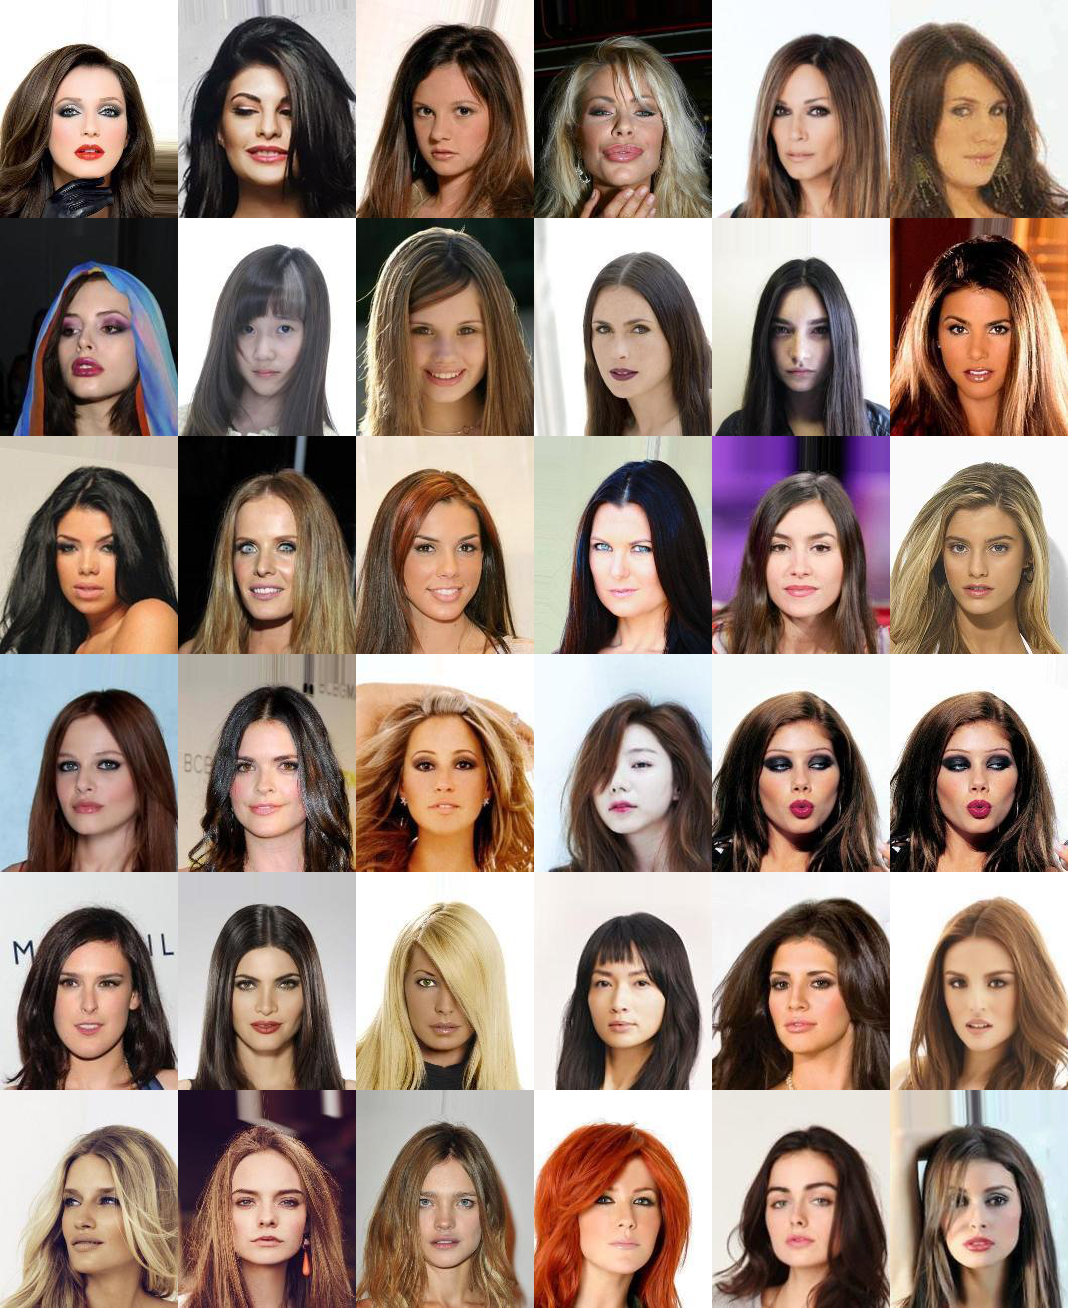

In [10]:
top_grid = grid(top_images, 6, 6)

top_grid.save(root/"results/Experiment5/top36_female.pdf")
display(top_grid)

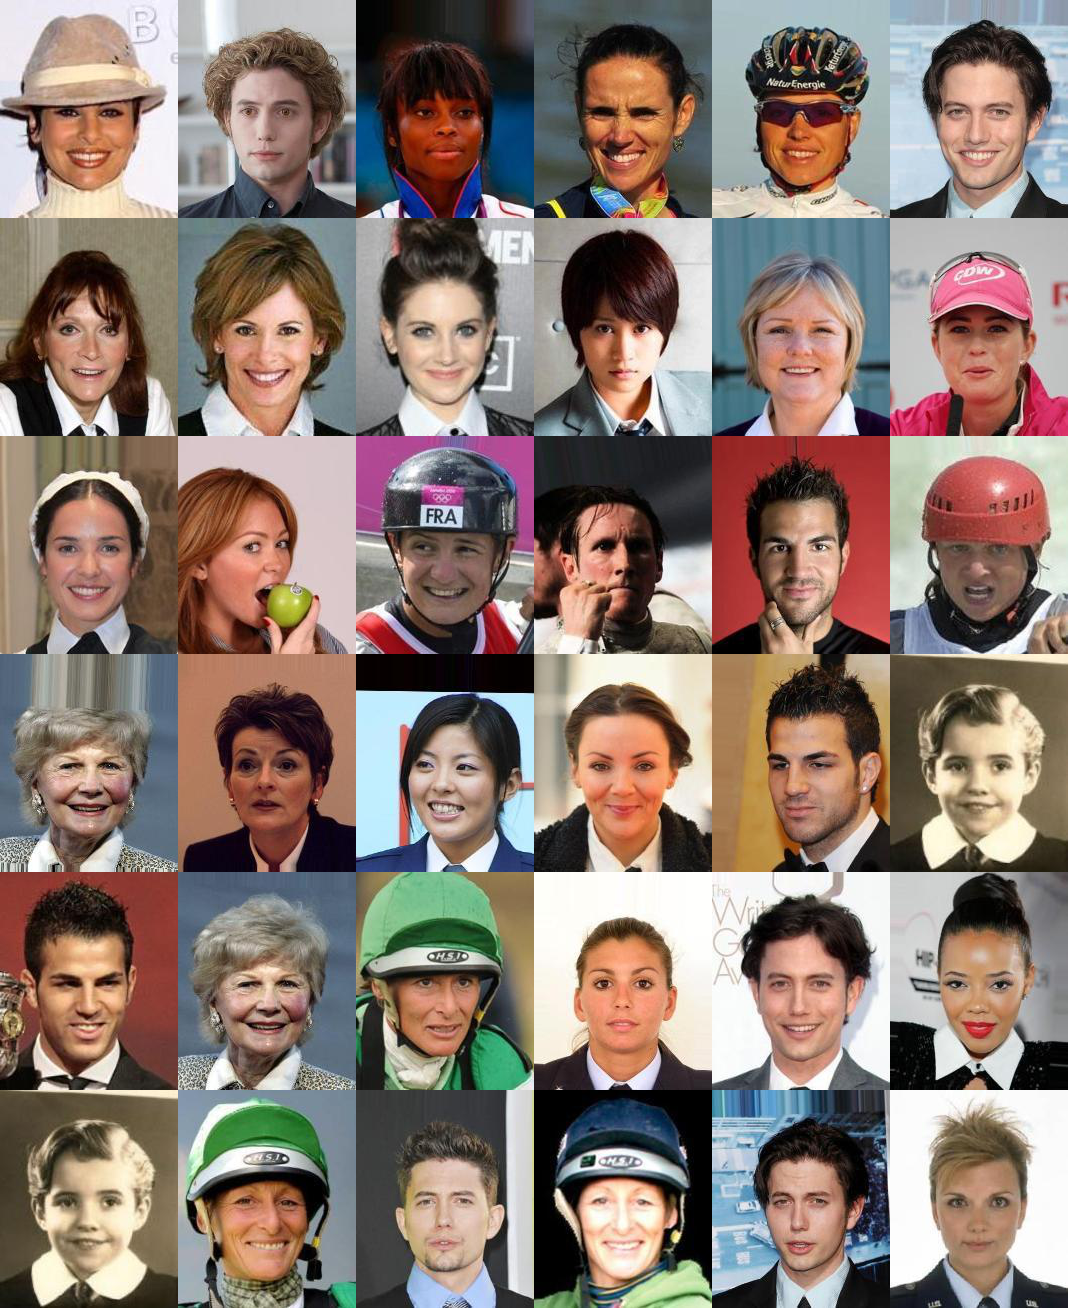

In [11]:
bottom_grid = grid(bottom_images, 6, 6)

bottom_grid.save(root/"results/Experiment5/bottom36_female.pdf")
display(bottom_grid)

In [12]:
attributes = list(set(female.columns)-{"image_id", "Male", "Kantorovich_potential"})
stats = list()
p_val= list()

for attr in attributes:
    
    col1 = female[female[attr] == 1].Kantorovich_potential
    col2 = female[female[attr] == -1].Kantorovich_potential
        
    test = ks_2samp(col1, col2)

    stats.append(test.statistic)
    p_val.append(test.pvalue)

table = pd.DataFrame({"attribute" : attributes, "statistic" : stats, "pvalue" : p_val})
table.set_index("attribute", inplace=True)

In [13]:
print(table.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  statistic &         pvalue \\
attribute           &            &                \\
\midrule
Big\_Nose            &   0.183163 &  5.180081e-319 \\
Black\_Hair          &   0.085891 &  1.442405e-120 \\
Wearing\_Hat         &   0.507319 &   0.000000e+00 \\
Blurry              &   0.201339 &  3.825684e-186 \\
Bushy\_Eyebrows      &   0.012242 &   2.022192e-01 \\
Smiling             &   0.079182 &  1.724750e-160 \\
Wearing\_Necktie     &   0.639481 &   1.910028e-14 \\
Bangs               &   0.085116 &  4.326647e-120 \\
Receding\_Hairline   &   0.361955 &   0.000000e+00 \\
Oval\_Face           &   0.020745 &   3.370716e-10 \\
Wavy\_Hair           &   0.247747 &   0.000000e+00 \\
Wearing\_Lipstick    &   0.322677 &   0.000000e+00 \\
Goatee              &   0.614611 &   2.972258e-05 \\
Narrow\_Eyes         &   0.016535 &   3.294208e-03 \\
Pointy\_Nose         &   0.088903 &  1.323519e-187 \\
Mouth\_Slightly\_Open &   0.056832 &   3.683745e-83 \\
Rosy\_Cheek

/var/folders/8p/14dt3sw51h52d_5d395588zh0000gn/T/ipykernel_1316/3293683267.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


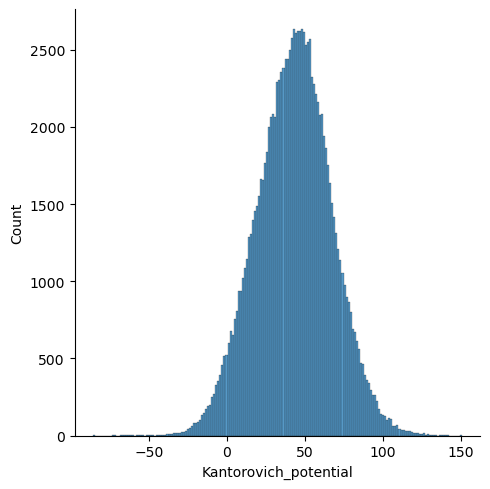

In [14]:
potentials = female["Kantorovich_potential"]

sns.displot(potentials)
plt.show()

In [71]:
quantiles_top = np.percentile(potentials, np.arange(10,100,10)+2)
quantiles_bottom = np.percentile(potentials, np.arange(10,100,10)-2)

In [72]:
quantiles_top

array([14.48536377, 24.66738647, 32.35636597, 38.88000488, 44.90761658,
       50.81863403, 57.18329468, 64.76162842, 76.47162598])

In [73]:
quantiles_bottom

array([ 8.85624268, 21.00636597, 29.44973267, 36.35547058, 42.56280823,
       48.44686035, 54.46639832, 61.51851196, 70.81896484])

In [26]:
def open_array(path):
    tensor = torch.load(path)
    
    return tensor.detach().numpy()

data = np.concatenate([open_array(celeba_folder/"resnet18"/"{}.pt".format(file[:-4])) for file in female.image_id])

In [28]:
import kmapper as km

In [44]:
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


In [45]:
projected_data = np.array(female.Kantorovich_potential)

In [47]:
projected_data = projected_data.reshape(-1,1)

In [53]:
cover = km.Cover(n_cubes=10, perc_overlap=0.5)

In [62]:
graph = mapper.map(projected_data, data, cover=cover, clusterer=sklearn.cluster.OPTICS())

Mapping on data shaped (118165, 512) using lens shaped (118165, 1)

Creating 10 hypercubes.


KeyboardInterrupt: 

In [ ]:
graph 

In [43]:
html = mapper.visualize(graph, path_html="../results/Experiment5/celeba_keplermapper_output.html",
                 title="")

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title> | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 700;\n  te

In [20]:
for file in female.image_id:
    print(celeba_folder/"resnet18"/file)
    break

../data/celeba/resnet18/005886.jpg
